## Name: Ishan Prabhune
## A20538828

In [1]:
#Importing the required Python Libraries
import numpy as npy
import scipy as spy
import pandas as pds
import matplotlib as mpl
import seaborn as sbn
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Malware_Multiclass Dataset
DataFrame = pds.read_csv('C:/Users/ishan/Downloads/malware_MultiClass.csv')

# Printing and Display the Dataframe in HTML
display(HTML(DataFrame.head(10).to_html()))

,hash,millisecond,classification,os,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,0,malware,CentOS,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,1,malware,Windows,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,2,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,3,malware,Ubuntu,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,4,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
5,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,5,malware,Windows,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
6,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,6,malware,Ubuntu,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
7,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,7,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
8,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,8,malware,CentOS,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
9,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,9,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,25,724,6852,0,150,120,124,211,0,120,3473,341974,0,130,120,0,3204448256,380690,4,0,0,0


In [3]:
# Printing the Shape of the dataframe
print(DataFrame.shape)

# Selected required columns
SelectedColumns = ['classification','os','usage_counter','prio','static_prio','normal_prio','vm_pgoff','vm_truncate_count','task_size','map_count','hiwater_rss','total_vm','shared_vm','exec_vm','reserved_vm','nr_ptes','nvcsw','nivcsw','signal_nvcsw']

# Extracting the required selected columns
DataFrame = DataFrame[SelectedColumns]

# Displaying the selected data
DataFrame.head(5)

(100000, 36)


,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [4]:
# Striping the column names
DataFrame=DataFrame.rename(columns=lambda x: x.strip())
cols=DataFrame.columns

# Displaying rows of the DataFrame
DataFrame.head(5)

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0


In [5]:
# Checking for missing values in DataFrame
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', DataFrame[i].dtype,',', DataFrame[i].isnull().any())

ColumnName, DataType, MissingValues
classification , object , False
os , object , False
usage_counter , int64 , False
prio , int64 , False
static_prio , int64 , False
normal_prio , int64 , False
vm_pgoff , int64 , False
vm_truncate_count , int64 , False
task_size , int64 , False
map_count , int64 , False
hiwater_rss , int64 , False
total_vm , int64 , False
shared_vm , int64 , False
exec_vm , int64 , False
reserved_vm , int64 , False
nr_ptes , int64 , False
nvcsw , int64 , False
nivcsw , int64 , False
signal_nvcsw , int64 , False


In [6]:
# Encoding the labels

from sklearn import preprocessing
from IPython.display import display, HTML

# defining label as nominal values
y = DataFrame['classification'] 
le = preprocessing.LabelEncoder()
le.fit(y)

# Encoding the nominal labels to integers
y_encoded = le.transform(y) 
DataFrame['classification'] = y_encoded

# Printing and displaying dataframe as tables in HTML
display(HTML(DataFrame.head(10).to_html()))

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,1,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,1,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,1,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,1,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,1,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
5,1,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
6,1,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
7,1,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
8,1,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
9,1,Mac,0,3069378560,14274,0,0,13173,0,6852,0,150,120,124,211,0,341974,0,0


In [7]:
# Data preprocessing

print('Column Datatypes:\n',DataFrame.dtypes)

# Converting all the nominal variables to binary variables
DataFrame_num=DataFrame.copy(deep=True) 

# Creating the new binary columns
DataFrame_dummies=pds.get_dummies(DataFrame_num[['os']])

# Adding them to the dataframe
DataFrame_num=DataFrame_num.join(DataFrame_dummies)

# Droping the original columns
DataFrame_num=DataFrame_num.drop('os',axis=1)

display('DataFrame_num:',HTML(DataFrame_num.head(5).to_html()))

Column Datatypes:
 classification        int32
os                   object
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
nvcsw                 int64
nivcsw                int64
signal_nvcsw          int64
dtype: object


'DataFrame_num:'

,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu,os_Windows
0,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,True,False,False,False,False
1,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,False,False,False,False,True
2,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,False,False,True,False,False
3,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,False,False,False,True,False
4,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,False,False,True,False,False


In [8]:
# N-1 dummy variable is encoded to avoid the multicollinearity issues

DataFrame_num=DataFrame_num.drop('os_Windows', axis=1)
DataFrame_num.head(10)

,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,...,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,os_CentOS,os_Debian,os_Mac,os_Ubuntu
0,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,True,False,False,False
1,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,False,False
2,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,True,False
3,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,False,True
4,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,True,False
5,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,False,False
6,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,False,True
7,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,False,False,True,False
8,1,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,True,False,False,False
9,1,0,3069378560,14274,0,0,13173,0,6852,0,...,124,211,0,341974,0,0,False,False,True,False


In [9]:
# Visualizing the best Tree model 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

y = DataFrame_num['classification']
x = DataFrame_num.drop('classification', axis=1)

# Using N-fold cross validation method
clfn=DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_leaf_nodes = 5, ccp_alpha = 0.0, min_samples_split=2, min_impurity_decrease=0.02)

precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
acc=cross_val_score(clfn, x, y, cv=5, scoring='accuracy').mean()
pre=cross_val_score(clfn, x, y, cv=5, scoring=precision).mean()
rec=cross_val_score(clfn, x, y, cv=5, scoring=recall).mean()
auc=cross_val_score(clfn, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation: Accuracy = ',acc, ', Precison = ', pre, ', Recall = ', rec, ', Auc = ', auc)

By N-fold Cross Validation: Accuracy =  0.9175599999999999 , Precison =  0.6135648925406842 , Recall =  0.6133668967089759 , Auc =  0.848447077134497


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

y = DataFrame_num['classification']
x = DataFrame_num.drop('classification', axis=1)

# Performing the cross fold validation
clfn=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes = 5, ccp_alpha = 0.0, 
                           min_samples_split=2,min_impurity_decrease=0.02)


precision = make_scorer(precision_score, average='macro')
recall = make_scorer(recall_score, average='macro')
auc = make_scorer(roc_auc_score, average='macro', multi_class='ovr', needs_proba=True)

x, y = shuffle(x, y)
acc=cross_val_score(clfn, x, y, cv=5, scoring='accuracy').mean()
pre=cross_val_score(clfn, x, y, cv=5, scoring=precision).mean()
rec=cross_val_score(clfn, x, y, cv=5, scoring=recall).mean()
auc=cross_val_score(clfn, x, y, cv=5, scoring=auc).mean()
print('By N-fold Cross Validation after changing scoring factor and hyperparameters: Accuracy = ',acc, ', Precison = ', pre, ', Recall = ', rec, ', Auc = ', auc)

By N-fold Cross Validation after changing scoring factor and hyperparameters: Accuracy =  0.9195399999999999 , Precison =  0.615105261410666 , Recall =  0.6146923453405456 , Auc =  0.8539552922910012


Fold AUC Scores:  [0.98912, 0.98911, 0.98912, 0.98912, 0.98912, 0.98912, 0.98912, 0.98912, 0.98912, 0.9893]
Best AUC Fold Index:  0
features:  ['usage_counter', 'prio', 'static_prio', 'normal_prio', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'nvcsw', 'nivcsw', 'signal_nvcsw', 'os_CentOS', 'os_Debian', 'os_Mac', 'os_Ubuntu']
labels:  ['benign' 'malware' 'unknown']


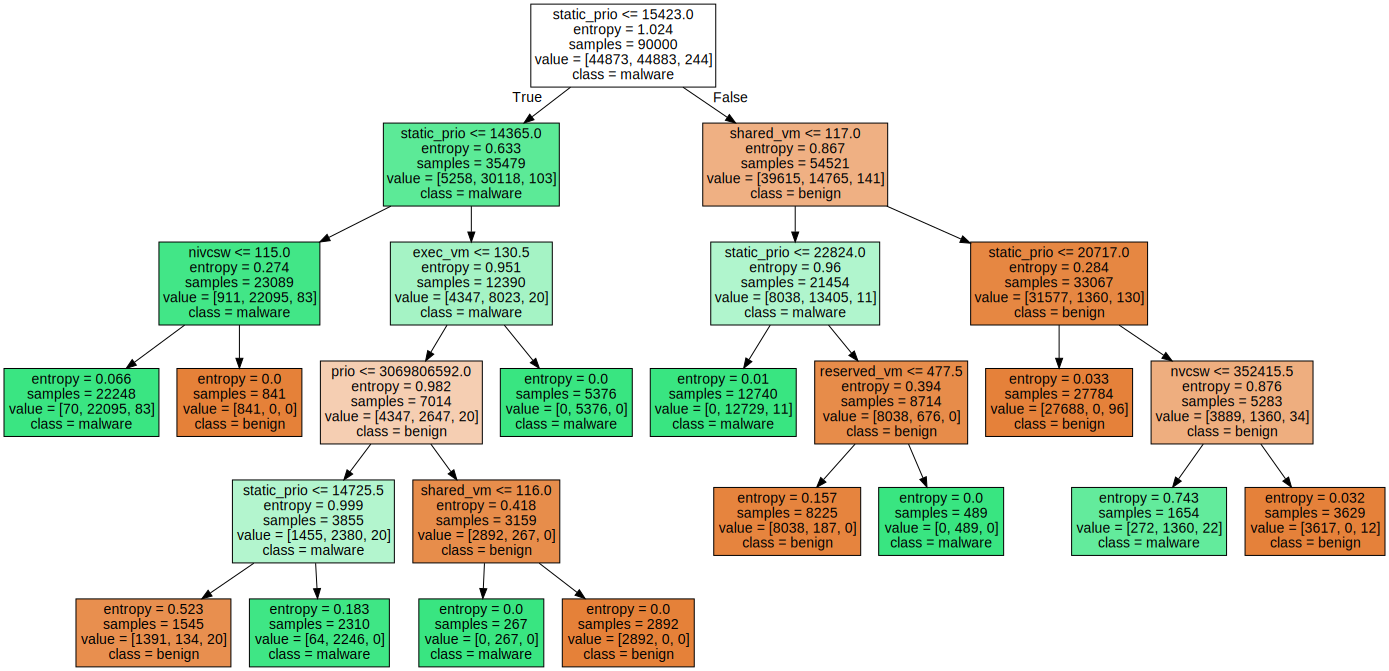

In [12]:
from sklearn import tree
import graphviz

clfn=DecisionTreeClassifier(criterion='entropy', max_depth=10, ccp_alpha = 0.01)
rst = cross_validate(clfn, x, y, cv=10, scoring='roc_auc', return_estimator=True)

# Fitting the trees for each fold
trees = rst['estimator']

# Printing the accuracy scores for each fold
scores = rst['test_score']

# Printing the details for debugging
print("Fold AUC Scores: ", [trees[i].score(x, y) for i in range(len(trees))])
print("Best AUC Fold Index: ", scores.argmax())

best_fold_index = scores.argmax()
best_clfn = trees[best_fold_index]
best_clfn

labels = le.inverse_transform(best_clfn.classes_)
print('features: ', x.columns.to_list())
print('labels: ', labels)

# DOT data
dot_data = tree.export_graphviz(best_clfn, out_file=None, feature_names=x.columns.to_list(), class_names=labels, filled=True)

# Drawing the graph
graph = graphviz.Source(dot_data, format="png") 

# Saving the graph to DecisionTree_HW4.png
graph.render("DecisionTree_HW4")
graph

# Conclusion
## The decision tree is built
## For the criterion log_loss
## The decision tree model achieves 91.75% accuracy, with 61.35% precision and 61.33% recall. 
## AUC stands at 84.84%, indicating good class distinction capabilities overall. Further optimization may enhance performance.

## For the criterion entropy
## The decision tree model with adjusted scoring and hyperparameters, the model achieves high consistency across metrics: 
## Accuracy 91.95%, Precision 61.51% and Recall 61.46%, along with a notably improved AUC of 85.39%.

## The criterion entropy has improved consistency and significantly higher AUC (85.39%) 
## with adjusted scoring and hyperparameters; overall better performance.